In [1]:
import os, sys, csv
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

In [2]:
# Glycine Analysis

gly_data={}
with open('Glycine.csv','r') as csvfile:
    gly_data['mL NaOH'] = []
    gly_data['pH'] = []
    
    reader = csv.DictReader(csvfile)
    for row in reader:
        gly_data['mL NaOH'].append(row['mL NaOH'])
        gly_data['pH'].append(row['pH'])
    
    gly_data['mL NaOH'] = np.array(gly_data['mL NaOH'], dtype=np.float32)
    gly_data['pH'] = np.array(gly_data['pH'], dtype=np.float32)


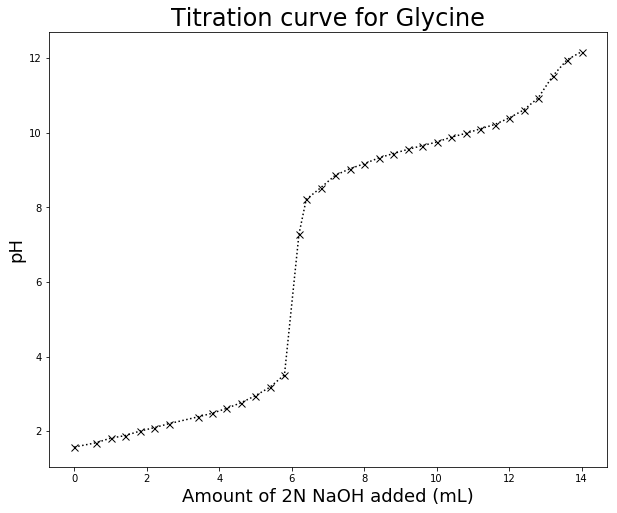

In [3]:
plt.close()
plt.figure(figsize=(10,8))
plt.plot(gly_data['mL NaOH'],gly_data['pH'],'kx:', markersize=7)


plt.title('Titration curve for Glycine', fontsize=24)
plt.xlabel('Amount of 2N NaOH added (mL)', fontsize=18)
plt.ylabel('pH', fontsize=18)
plt.gcf().set_facecolor('white')

#plt.gcf().savefig('Glycine_titration.png')
plt.show()

In [4]:
# Histidine Analysis

his_data={}
with open('Histidine.csv','r') as csvfile:
    his_data['mL NaOH'] = []
    his_data['pH'] = []
    
    reader = csv.DictReader(csvfile)
    for row in reader:
        his_data['mL NaOH'].append(row['mL NaOH'])
        his_data['pH'].append(row['pH'])
    
    his_data['mL NaOH'] = np.array(his_data['mL NaOH'], dtype=np.float32)
    his_data['pH'] = np.array(his_data['pH'], dtype=np.float32)


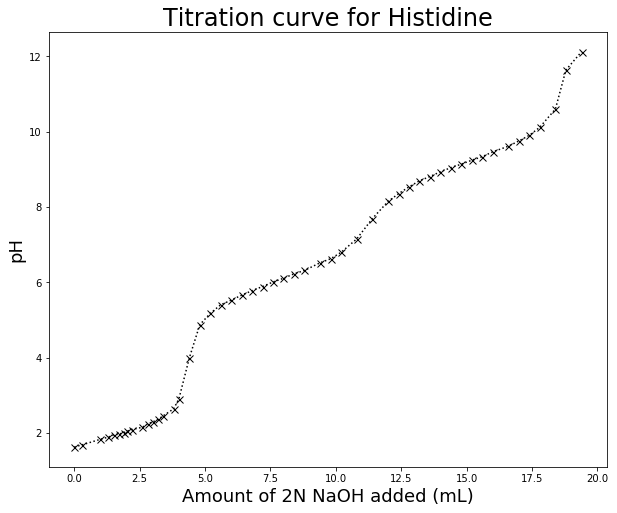

In [5]:
plt.close()
plt.figure(figsize=(10,8))
plt.plot(his_data['mL NaOH'],his_data['pH'],'kx:', markersize=7)


plt.title('Titration curve for Histidine', fontsize=24)
plt.xlabel('Amount of 2N NaOH added (mL)', fontsize=18)
plt.ylabel('pH', fontsize=18)
plt.gcf().set_facecolor('white')

plt.gcf().savefig('Histidine_titration.png')
plt.show()

[ 6. 13.]


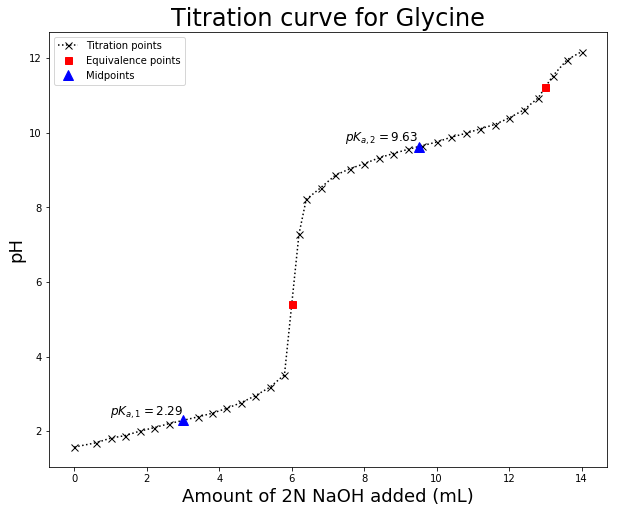

In [6]:
xx = gly_data['mL NaOH']
x1 = (gly_data['mL NaOH'][:-1] + gly_data['mL NaOH'][1:])/2.0
x2 = (x1[:-1] + x1[1:])/2.0
d1 = np.diff(gly_data['pH'])
d2 = np.diff(gly_data['pH'], n=2)

equiv_mL = x1[np.argmax(d1)]
equiv_pH = np.interp(equiv_mL, xx, gly_data['pH'])

eq_pts = np.concatenate(([xx[0]],x1[signal.argrelmax(d1, order=5)[0]],[xx[-1]]))
eq_pH = np.array([np.interp(xi, xx, gly_data['pH']) for xi in eq_pts])

midpts_mL = (eq_pts[:-1] + eq_pts[1:])/2.0
midpts_pH = np.array([np.interp(xi, xx, gly_data['pH']) for xi in midpts_mL])

plt.close()
plt.figure(figsize=(10,8))
plt.plot(gly_data['mL NaOH'],gly_data['pH'],'kx:', markersize=7)
plt.plot(eq_pts[1:-1], eq_pH[1:-1], 'rs', markersize=7)

plt.plot(midpts_mL[:-1], midpts_pH[:-1], 'b^', markersize=10)
plt.text(midpts_mL[0], midpts_pH[0], '$pK_{a,1}=%0.2f$' % midpts_pH[0],
         fontsize=12, horizontalalignment='right', verticalalignment='bottom')
plt.text(midpts_mL[1], midpts_pH[1], '$pK_{a,2}=%0.2f$' % midpts_pH[1],
         fontsize=12, horizontalalignment='right', verticalalignment='bottom')

plt.legend(['Titration points', 'Equivalence points', 'Midpoints'])
plt.title('Titration curve for Glycine', fontsize=24)
plt.xlabel('Amount of 2N NaOH added (mL)', fontsize=18)
plt.ylabel('pH', fontsize=18)
plt.gcf().set_facecolor('white')

print(eq_pts[1:-1])
plt.gcf().savefig('Glycine_titration.png')
plt.show()

[ 4.2      11.1      18.599998]


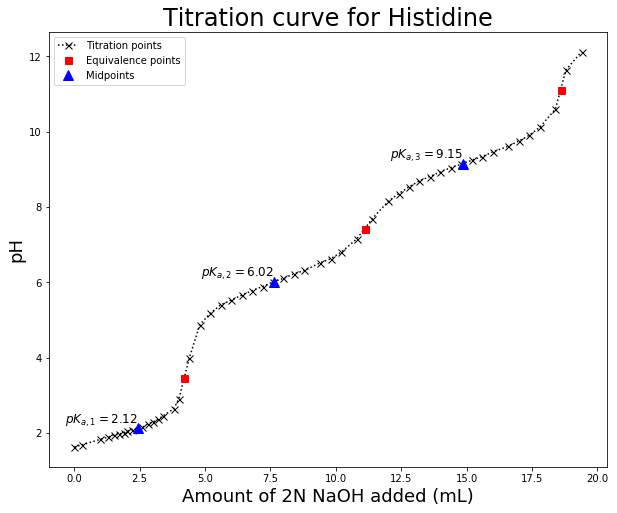

In [7]:
xx = his_data['mL NaOH']
x1 = (his_data['mL NaOH'][:-1] + his_data['mL NaOH'][1:])/2.0
x2 = (x1[:-1] + x1[1:])/2.0
d1 = np.diff(his_data['pH'])
d2 = np.diff(his_data['pH'], n=2)

#equiv_mL = x1[np.argmax(d1)]
#equiv_pH = np.interp(equiv_mL, xx, his_data['pH'])

eq_pts = np.concatenate(([xx[0]],x1[signal.argrelmax(d1, order=5)[0]],[xx[-1]]))
eq_pH = np.array([np.interp(xi, xx, his_data['pH']) for xi in eq_pts])

midpts_mL = (eq_pts[:-1] + eq_pts[1:])/2.0
midpts_pH = np.array([np.interp(xi, xx, his_data['pH']) for xi in midpts_mL])

plt.close()
plt.figure(figsize=(10,8))
plt.plot(his_data['mL NaOH'],his_data['pH'],'kx:', markersize=7)
plt.plot(eq_pts[2:-1], eq_pH[2:-1], 'rs', markersize=7)

plt.plot(midpts_mL[1:-1], midpts_pH[1:-1], 'b^', markersize=10)
plt.text(midpts_mL[1], midpts_pH[1], '$pK_{a,1}=%0.2f$' % midpts_pH[1],
         fontsize=12, horizontalalignment='right', verticalalignment='bottom')
plt.text(midpts_mL[2], midpts_pH[2], '$pK_{a,2}=%0.2f$' % midpts_pH[2],
         fontsize=12, horizontalalignment='right', verticalalignment='bottom')
plt.text(midpts_mL[3], midpts_pH[3], '$pK_{a,3}=%0.2f$' % midpts_pH[3],
         fontsize=12, horizontalalignment='right', verticalalignment='bottom')

plt.legend(['Titration points', 'Equivalence points', 'Midpoints'])
plt.title('Titration curve for Histidine', fontsize=24)
plt.xlabel('Amount of 2N NaOH added (mL)', fontsize=18)
plt.ylabel('pH', fontsize=18)
plt.gcf().set_facecolor('white')

print(eq_pts[2:-1])
plt.gcf().savefig('Histidine_titration.png')
plt.show()